In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import jaxley as jx

### Panel a

In [24]:
n = 1_000
_ = np.random.seed(0)
samples1 = np.random.rand(n) * 900 + 100
samples2 = np.random.rand(n) * 0.1


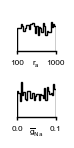

In [191]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(2, 1, figsize=(0.5, 1.4))
    ax[0].hist(samples1, bins=30, range=(100, 1000), histtype="step", color="k", density=False)
    ax[0].set_xlim([100, 1000])
    ax[0].set_xticks([100, 1000])
    ax[1].hist(samples2, bins=30, range=(0, 0.1), histtype="step", color="k", density=False)
    ax[1].set_xlim([0, 0.1])
    ax[1].set_xticks([0, 0.1])
    for i in range(2):
        ax[i].set_yticks([])
        ax[i].set_ylim([0, 60])
        ax[i].spines["left"].set_visible(False)

    ax[0].set_xlabel(r"$r_a$", labelpad=-4)
    ax[1].set_xlabel(r"$\overline{g}_{\text{Na}}$", labelpad=-4)
    plt.subplots_adjust(hspace=0.6)
    plt.savefig("../svg/tricks_panel_a1.svg", bbox_inches="tight", transparent=True)
    plt.show()

In [192]:
transform = jx.ParamTransform(
    lowers={"r_a": 100, "g": 0.0},
    uppers={"r_a": 1_000, "g": 0.1},
)

In [193]:
samples1_tf = transform.inverse([{"r_a": samples1}])[0]["r_a"]
samples2_tf = transform.inverse([{"g": samples2}])[0]["g"]
sampels_tf = [samples1_tf, samples2_tf]

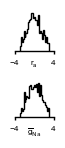

In [194]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(2, 1, figsize=(0.5, 1.4))
    for i in range(2):
        ax[i].hist(sampels_tf[i], bins=30, range=(-3, 3), histtype="step", color="k", density=False)
        ax[i].set_xlim([-4, 4])
        ax[i].set_xticks([-4, 4])
        ax[i].set_yticks([])
        ax[i].set_ylim([0, 60])
        ax[i].spines["left"].set_visible(False)

    ax[0].set_xlabel(r"$r_a$", labelpad=-4)
    ax[1].set_xlabel(r"$\overline{g}_{\text{Na}}$", labelpad=-4)
    plt.subplots_adjust(hspace=0.6)
    plt.savefig("../svg/tricks_panel_a2.svg", bbox_inches="tight", transparent=True)
    plt.show()

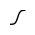

In [195]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.2, 0.2))
    x = np.linspace(-6, 6, 100)
    ax.plot(x, 1 / (1 + np.exp(-x)), c="k")
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.savefig("../svg/tricks_panel_a3.svg", bbox_inches="tight", transparent=True)
    plt.show()

### Panel b

In [196]:
x = np.linspace(-5, 5, 500)
y = x ** 2 + 3 * np.sin(x*5) + 2 * np.sin(x*12) + 1 * np.sin(x*16)


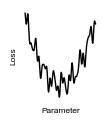

In [197]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.0, 1.2))
    ax.plot(x, y, c="k")
    _ = ax.spines["left"].set_visible(False)
    _ = ax.spines["bottom"].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("Parameter")
    ax.set_ylabel("Loss")
    plt.savefig("../svg/tricks_panel_b.svg", bbox_inches="tight", transparent=True)
    plt.show()

### Panel c

Drawn in inkscape

### Panel d

Drawn in inkscape

### Panel e

# Assemble

In [231]:
import time
import IPython.display as IPd
from svgutils.compose import *

def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '8pt', 'font': 'Arial', 'weight': '800'}
kwargs_text_normal = {'size': '6pt', 'font': 'Arial'}

f = Figure(
    "18.0cm",
    "3.9cm",

    Panel(
        SVG("../svg/tricks_panel_a1.svg").scale(svg_scale),
        SVG("../svg/tricks_panel_a2.svg").scale(svg_scale).move(70, 0),
        SVG("../svg/tricks_panel_a3.svg").scale(svg_scale).move(55, 40),
        Text("a", 10, -2.0, **kwargs_text),
        Text("Parameter transformation", 30, -2.0, **kwargs_text_normal),
    ).move(-10, 10),

    Panel(
        SVG("../svg/tricks_panel_b.svg").scale(svg_scale).move(0, 15),
        Text("b", 10, -2.0, **kwargs_text),
        Text("Learning rate scheduling", 25, -2.0, **kwargs_text_normal),
    ).move(140, 10),

    Panel(
        SVG("../svg/tricks_panel_c.svg").scale(5.0).move(0, 40),
        Text("c", 10, -2.0, **kwargs_text),
        Text("Polyak SGD", 25, -2.0, **kwargs_text_normal),
    ).move(280, 10),

    Panel(
        SVG("../svg/tricks_panel_d.svg").scale(3.0).move(10, 40),
        Text("d", -5, 8.0, **kwargs_text),
        Text("Type-specific optimizers", 5, 8.0, **kwargs_text_normal),
    ).move(390, 0),

    Panel(
        SVG("../svg/tricks_panel_e.svg").scale(3.0).move(20, 20),
        Text("e", 10, -2.0, **kwargs_text),
        Text("Checkpointing", 25, -2.0, **kwargs_text_normal),
    ).move(500, 10),

    Panel(
        SVG("../svg/tricks_panel_f.svg").scale(3.0).move(20, 30),
        Text("f", 10, -2.0, **kwargs_text),
        Text("Truncate gradient", 25, -2.0, **kwargs_text_normal),
    ).move(590, 10),
)

!mkdir -p fig
f.save("../fig/fig1_tricks.svg")
svg("../fig/fig1_tricks.svg")